# Project 1: How to increase SAT participation?

## Executive Summary

In the U.S., the SAT and ACT are the two most well-known standardised tests used for admission into colleges or universities. The SAT was introduced to the U.S. in 1926 whereas the ACT was introduced in 1959 as a competitor to the SAT.

The SAT has traditionally been the most popular college admissions test in the U.S., but in the past decade, the ACT had gained significant ground and between 2012 and 2017, it overtook the SAT as the most widely used college admissions test.

To win back its market share, the College Board implemented major changes to the format of the SAT and aggressively bade for statewide contracts to administer the SAT tests amongst high school students. In 2018, the College Board's efforts finally paid off and the SAT surpassed the ACT to become the dominant college admissions test once more.

### Problem Statement
In this project, we examine the ACT and SAT scores and participation rates by state in 2017 and 2018 to identify a specific state that the College Board can target to drive higher SAT participation rates going forward.



### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
sat_17 = pd.read_csv('../data/sat_2017.csv')
act_17 = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
sat_17.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [4]:
act_17.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

**``sat_17``**
- This dataset comprises, for each U.S. state:
    - The test participation rate;
    - Average scores for the two main sections (Evidence-Based Reading and Writing, and Math);
    - Sum of the two section scores.
- Each section is scored between 200-800 and the total maximum SAT score is 800 + 800 = 1,600

**``act_17``**
- This dataset contains, for each U.S. state:
    - The test participation rate; 
    - Average scores for each of the four test sections (English, Math, Reading, and Science);
    - The final composite score, which is the average of the four section scores.
- Unlike the SAT dataset, the ACT dataset also includes the average National scores.

In [5]:
act_17.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


In [6]:
act_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


In [7]:
sat_17.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [8]:
sat_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


#### 4a. Does the data look complete? 
**Answer:** The SAT is missing scores for the national average, but other than that, the data looks complete.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

**Answer:**

**SAT:** Each section is scored out of 800 points. The lowest possible score is 200. The SAT total score ranges from 400 to 1600.
- The score for the Math section for Maryland is 52, which is theoretically impossible. The actual score should be 524.

**ACT:** Each section is scored out of 36 points. The lowest possible score is 1.
The highest possible composite score on the ACT is 36. 
- For Maryland, the score for the Science section is 2.3, which is suspiciously low. Upon checking, the actual score should be 23.2.


#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [9]:
# update SAT Math score for Maryland
sat_17.loc[sat_17['State'] == 'Maryland', 'Math'] = 524

In [10]:
# update ACT Science score for Maryland
act_17.loc[act_17['State'] == 'Maryland', 'Science'] = 23.2

#### 5. What are your data types? 
Display the data types of each feature. 

In [11]:
act_17.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [12]:
sat_17.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

**Answer:**

**ACT**
- `Participation`: should remove '%' and convert into a float.
- `Composite`: should be converted from string to float.

**SAT**
- `Participation`: should remove '%' and convert into a float.



#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [13]:
def str_to_float(participation_rate):
    return float(participation_rate.replace('%', '')) / 100 
            # or participation_rate.strip('%')

In [14]:
# convert ACT participation rate to floats
act_17['Participation'] = act_17['Participation'].apply(str_to_float)

In [15]:
# convert SAT participation rate to floats
sat_17['Participation'] = sat_17['Participation'].apply(str_to_float)

In [16]:
# convert ACT Composite score to float
# commented out as we ran into an error in converting one of the strings to a float
# act_17['Composite'] = pd.to_numeric(act_17['Composite'])

- Fix any individual values preventing other columns from being the appropriate type.

In [17]:
# fix ACT Composite score for Wyoming
act_17.loc[act_17['State'] == 'Wyoming', 'Composite'] = 20.2

- Finish your data modifications by making sure the columns are now typed appropriately.

In [18]:
# convert ACT Composite score to float
act_17['Composite'] = pd.to_numeric(act_17['Composite'])

- Display the data types again to confirm they are correct.

In [19]:
sat_17.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [20]:
act_17.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [21]:
act_17.columns

Index(['State', 'Participation', 'English', 'Math', 'Reading', 'Science',
       'Composite'],
      dtype='object')

In [22]:
sat_17.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [23]:
# rename ACT 2017 columns
act_17_columns = ['state', 'act_17_participation', 'act_17_english', 'act_17_math', 
                  'act_17_reading', 'act_17_science', 'act_17_composite']
act_17.columns = act_17_columns

# print and check
act_17.columns

Index(['state', 'act_17_participation', 'act_17_english', 'act_17_math',
       'act_17_reading', 'act_17_science', 'act_17_composite'],
      dtype='object')

In [24]:
# rename SAT 2017 columns
sat_17_columns = ['state', 'sat_17_participation', 'sat_17_read_write', 'sat_17_math', 'sat_17_total']
sat_17.columns = sat_17_columns

# print and check
sat_17.columns

Index(['state', 'sat_17_participation', 'sat_17_read_write', 'sat_17_math',
       'sat_17_total'],
      dtype='object')

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|ACT/SAT|Name of U.S. state|
|sat_17_participation|float|2017 SAT|Participation rate in SAT for each state|
|sat_17_read_write|int|2017 SAT|Average score for the Evidence-based Reading and Writing (EBRW) section of SAT, between 200 and 800|
|sat_17_math|int|2017 SAT|Average score for the Math section of SAT, between 200 and 800|
|sat_17_total|int|2017 SAT|Total SAT score, combining EBRW and Math sections, between 400 and 1600|
|act_17_participation|float|2017 ACT|Participation rate in ACT for each state|
|act_17_english|float|2017 ACT|Average score for the English section of ACT, between 1 and 36|
|act_17_math|float|2017 ACT|Average score for the Math section of ACT, between 1 and 36|
|act_17_reading|float|2017 ACT|Average score for the Reading section of ACT, between 1 and 36|
|act_17_science|float|2017 ACT|Average score for the Science section of ACT, between 1 and 36|
|act_17_composite|float|2017 ACT|Composite score of ACT, averaging scores from four sections, between 1 and 36|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [25]:
# convert the state column to a list to iterate through later
list_1 = list(sat_17.state)
list_2 = list(act_17.state)

In [26]:
# see which one is longer
print('length of SAT dataframe: ' + str(len(list_1)))
print('length of ACT dataframe: ' + str(len(list_2)))

length of SAT dataframe: 51
length of ACT dataframe: 52


In [27]:
# find the discrepancy
extra = [x for x in list_2 if x not in list_1]
extra

['National']

In [28]:
# see index of 'National' row
act_17[act_17['state'] == 'National']

,state,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite
0,National,0.6,20.3,20.7,21.4,21.0,21.0


In [29]:
# drop the row for 'National' in ACT 2017
act_17.drop(index=0, inplace=True)

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [30]:
act_sat_17 = pd.merge(act_17, sat_17, on='state')

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [31]:
act_sat_17.to_csv('../data/combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [32]:
act_18 = pd.read_csv('../data/act_2018_updated.csv')
sat_18 = pd.read_csv('../data/sat_2018.csv')

In [33]:
act_18.head(3)

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2


In [34]:
sat_18.head(3)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149


In [35]:
sat_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [36]:
sat_18.describe()
# there seems to be no erroneous data

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,563.686275,556.235294,1120.019608
std,47.502627,47.772623,94.155083
min,480.000000,480.000000,977.000000
25%,534.500000,522.500000,1057.500000
50%,552.000000,544.000000,1098.000000
75%,610.500000,593.500000,1204.000000
max,643.000000,655.000000,1298.000000


In [37]:
act_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          51 non-null     object 
 1   Percentage of Students Tested  51 non-null     int64  
 2   Average Composite Score        51 non-null     float64
 3   Average English Score          51 non-null     float64
 4   Average Math Score             51 non-null     float64
 5   Average Reading Score          51 non-null     float64
 6   Average Science Score          51 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


In [38]:
act_18.describe()
# there seems to be no erroneous data

,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,61.647059,21.486275,20.988235,21.125490,22.015686,21.345098
std,34.080976,2.106278,2.446356,2.035765,2.167245,1.870114
min,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000
25%,28.500000,19.950000,19.100000,19.400000,20.450000,19.850000
50%,66.000000,21.300000,20.200000,20.700000,21.600000,21.100000
75%,100.000000,23.550000,23.700000,23.150000,24.100000,23.050000
max,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000


## Rename columns

In [39]:
sat_18.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [40]:
act_18.columns

Index(['State', 'Percentage of Students Tested', 'Average Composite Score',
       'Average English Score', 'Average Math Score', 'Average Reading Score',
       'Average Science Score'],
      dtype='object')

In [41]:
# rename ACT 2018 columns
act_18_columns = ['state', 'act_18_participation', 'act_18_composite', 'act_18_english',
                  'act_18_math', 'act_18_reading', 'act_18_science']
act_18.columns = act_18_columns

# print and check
act_18.columns

Index(['state', 'act_18_participation', 'act_18_composite', 'act_18_english',
       'act_18_math', 'act_18_reading', 'act_18_science'],
      dtype='object')

In [42]:
# rename SAT 2018 columns
sat_18_columns = ['state', 'sat_18_participation', 'sat_18_read_write', 'sat_18_math', 'sat_18_total']
sat_18.columns = sat_18_columns

# print and check
sat_18.columns

Index(['state', 'sat_18_participation', 'sat_18_read_write', 'sat_18_math',
       'sat_18_total'],
      dtype='object')

## Convert datatypes

In [43]:
sat_18['sat_18_participation'] = sat_18['sat_18_participation'].apply(str_to_float)

In [44]:
act_18['act_18_participation'] = act_18['act_18_participation'] / 100

In [45]:
sat_17.dtypes

state                    object
sat_17_participation    float64
sat_17_read_write         int64
sat_17_math               int64
sat_17_total              int64
dtype: object

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [46]:
act_sat_18 = pd.merge(act_18, sat_18, on='state')

In [47]:
df_final = pd.merge(act_sat_17, act_sat_18, on='state')

In [48]:
df_final.to_csv('../data/final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [49]:
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
act_17_participation,51.0,0.652549,0.321408,0.08,0.310,0.69,1.000,1.0
act_17_english,51.0,20.931373,2.353677,16.30,19.000,20.70,23.300,25.5
act_17_math,51.0,21.182353,1.981989,18.00,19.400,20.90,23.100,25.3
act_17_reading,51.0,22.013725,2.067271,18.10,20.450,21.80,24.150,26.0
act_17_science,51.0,21.450980,1.739353,18.20,19.950,21.30,23.200,24.9
act_17_composite,51.0,21.519608,2.020695,17.80,19.800,21.40,23.600,25.5
sat_17_participation,51.0,0.398039,0.352766,0.02,0.040,0.38,0.660,1.0
sat_17_read_write,51.0,569.117647,45.666901,482.00,533.500,559.00,613.000,644.0
sat_17_math,51.0,556.882353,47.121395,468.00,523.500,548.00,599.000,651.0
sat_17_total,51.0,1126.098039,92.494812,950.00,1055.500,1107.00,1212.000,1295.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [50]:
def std_dev(col):
    avg = np.mean(col)
    mse = []
    
    for i in col:
        mse.append((i - avg) ** 2)
    
    variance = sum(mse) / len(col)
   
    return variance ** 0.5

In [51]:
# this works too
# def std_cal(val):       
#     return np.sqrt(np.mean((val - np.mean(val))**2))

In [52]:
print(std_dev(df_final.sat_18_total))

93.22742384464433


- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [53]:
# dictionary keys
keys = list(df_final.columns[1:]) # exclude first 'state' column
type(keys)

list

In [54]:
{keys[i]: std_dev(df_final[keys[i]]) for i in range(len(keys))}

{'act_17_participation': 0.3182417575123181,
 'act_17_english': 2.3304876369363363,
 'act_17_math': 1.9624620273436781,
 'act_17_reading': 2.0469029314842646,
 'act_17_science': 1.7222161451443676,
 'act_17_composite': 2.000786081581989,
 'sat_17_participation': 0.3492907076664507,
 'sat_17_read_write': 45.21697020437866,
 'sat_17_math': 46.65713364485503,
 'sat_17_total': 91.58351056778743,
 'act_18_participation': 0.33745194881997503,
 'act_18_composite': 2.0855261815801147,
 'act_18_english': 2.4222536143202795,
 'act_18_math': 2.015707255555717,
 'act_18_reading': 2.145891884510421,
 'act_18_science': 1.8516885484833543,
 'sat_18_participation': 0.3694661922353942,
 'sat_18_read_write': 47.03460978357609,
 'sat_18_math': 47.30194550378352,
 'sat_18_total': 93.22742384464433}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

**Answer:**
The manually calculated standard deviations do not match up to the output from Pandas `describe`. However, it matches up to NumPy's `std` method. This discrepancy occurs because Pandas uses $N-1$ in its denominator instead of $N$ like NumPy. This is known as Bessel's correction, where $N-1$ instead of $N$ is used in the denominator of the standard deviation formula.

In [55]:
np.std(df_final)

act_17_participation     0.318242
act_17_english           2.330488
act_17_math              1.962462
act_17_reading           2.046903
act_17_science           1.722216
act_17_composite         2.000786
sat_17_participation     0.349291
sat_17_read_write       45.216970
sat_17_math             46.657134
sat_17_total            91.583511
act_18_participation     0.337452
act_18_composite         2.085526
act_18_english           2.422254
act_18_math              2.015707
act_18_reading           2.145892
act_18_science           1.851689
sat_18_participation     0.369466
sat_18_read_write       47.034610
sat_18_math             47.301946
sat_18_total            93.227424
dtype: float64

---
## Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

### Highest and lowest ACT and SAT participation rates

#### SAT 2017 participation rates
- North Dakota, Mississippi, and Iowa have the lowest participation rates at 2%.
- The District of Columbia, Michigan, Connecticut, and Delaware have the highest participation rates at 100%.

In [56]:
# SAT 2017 lowest participation rates
df_final[['state', 'sat_17_participation']].sort_values('sat_17_participation').head()

,state,sat_17_participation
34,North Dakota,0.02
24,Mississippi,0.02
15,Iowa,0.02
25,Missouri,0.03
44,Utah,0.03


In [57]:
# SAT 2017 highest participation rates
df_final[['state', 'sat_17_participation']].sort_values('sat_17_participation', ascending=False).head()

,state,sat_17_participation
8,District of Columbia,1.00
22,Michigan,1.00
6,Connecticut,1.00
7,Delaware,1.00
29,New Hampshire,0.96


#### SAT 2018 participation rates
- North Dakota has the lowest participation rates at 2%.
- Colorado, Connecticut, Delaware, Michigan, and Idaho have the highest participation rates at 100%.

In [58]:
# SAT 2018 lowest participation rates
df_final[['state', 'sat_18_participation']].sort_values('sat_18_participation').head()

,state,sat_18_participation
34,North Dakota,0.02
50,Wyoming,0.03
41,South Dakota,0.03
27,Nebraska,0.03
49,Wisconsin,0.03


In [59]:
# SAT 2018 highest participation rates
df_final[['state', 'sat_18_participation']].sort_values('sat_18_participation', ascending=False).head(7)

,state,sat_18_participation
5,Colorado,1.00
6,Connecticut,1.00
7,Delaware,1.00
22,Michigan,1.00
12,Idaho,1.00
19,Maine,0.99
13,Illinois,0.99


#### ACT 2017 participation rates
- Maine has the lowest participation rate at 8%.
- ACT's lowest participation rates are not as low as SAT's lowest participation rates.
- Alabama, Kentucky, Wisconsin, Utah, Tennessee, South Carolina, Oklahoma, North Carolina, Nevada, Montana, Mississippi, Minnesota, Louisiana, Missouri, Wyoming, Colorado, and Arkansas have the highest participation rates at 100%.
- ACT has a lot more states with a 100% participation rate compared to the SAT.

In [60]:
# ACT 2017 lowest participation rates
df_final[['state', 'act_17_participation']].sort_values('act_17_participation').head()

,state,act_17_participation
19,Maine,0.08
29,New Hampshire,0.18
7,Delaware,0.18
39,Rhode Island,0.21
38,Pennsylvania,0.23


In [61]:
# ACT 2017 highest participation rates
df_final[['state', 'act_17_participation']].sort_values('act_17_participation', ascending=False).head(20)

,state,act_17_participation
0,Alabama,1.00
17,Kentucky,1.00
49,Wisconsin,1.00
44,Utah,1.00
42,Tennessee,1.00
40,South Carolina,1.00
36,Oklahoma,1.00
33,North Carolina,1.00
28,Nevada,1.00
26,Montana,1.00


#### ACT 2018 participation rates
- Maine has the lowest participation rate at 7%.
- Alabama, Kentucky, Wisconsin, Utah, Tennessee, South Carolina, Oklahoma, Ohio, North Carolina, Nevada, Nebraska, Montana, Mississippi, Louisiana, Missouri, Wyoming, and Arkansas have the highest participation rates at 100%.

In [62]:
# ACT 2018 lowest participation rates
df_final[['state', 'act_18_participation']].sort_values('act_18_participation').head()

,state,act_18_participation
19,Maine,0.07
39,Rhode Island,0.15
29,New Hampshire,0.16
7,Delaware,0.17
38,Pennsylvania,0.20


In [63]:
# ACT 2018 highest participation rates
df_final[['state', 'act_18_participation']].sort_values('act_18_participation', ascending=False).head(20)

,state,act_18_participation
0,Alabama,1.00
17,Kentucky,1.00
49,Wisconsin,1.00
44,Utah,1.00
42,Tennessee,1.00
40,South Carolina,1.00
36,Oklahoma,1.00
35,Ohio,1.00
33,North Carolina,1.00
28,Nevada,1.00


### Highest and lowest SAT Total / ACT Composite Scores

#### SAT 2017 Total Scores

In [64]:
# SAT 2017 Lowest Total Scores
df_final[['state', 'sat_17_total']].sort_values('sat_17_total').head()

,state,sat_17_total
8,District of Columbia,950
7,Delaware,996
12,Idaho,1005
22,Michigan,1005
19,Maine,1012


In [65]:
# SAT 2017 Highest Total Scores
df_final[['state', 'sat_17_total']].sort_values('sat_17_total', ascending=False).head()

,state,sat_17_total
23,Minnesota,1295
49,Wisconsin,1291
15,Iowa,1275
25,Missouri,1271
16,Kansas,1260


#### SAT 2018 Total Scores

In [66]:
# SAT 2018 Lowest Total Scores
df_final[['state', 'sat_18_total']].sort_values('sat_18_total').head()

,state,sat_18_total
8,District of Columbia,977
7,Delaware,998
48,West Virginia,999
12,Idaho,1001
44,Utah,1010


In [67]:
# SAT 2018 Highest Total Scores
df_final[['state', 'sat_18_total']].sort_values('sat_18_total', ascending=False).head()

,state,sat_18_total
23,Minnesota,1298
49,Wisconsin,1294
34,North Dakota,1283
15,Iowa,1265
16,Kansas,1265


#### ACT 2017 Total Scores

In [68]:
# ACT 2017 Lowest Total Scores
df_final[['state', 'act_17_composite']].sort_values('act_17_composite').head()

,state,act_17_composite
28,Nevada,17.8
24,Mississippi,18.6
40,South Carolina,18.7
11,Hawaii,19.0
33,North Carolina,19.1


In [69]:
# ACT 2017 Highest Total Scores
df_final[['state', 'act_17_composite']].sort_values('act_17_composite', ascending=False).head()

,state,act_17_composite
29,New Hampshire,25.5
21,Massachusetts,25.4
6,Connecticut,25.2
19,Maine,24.3
8,District of Columbia,24.2


#### ACT 2018 Total Scores

In [70]:
# ACT 2018 Lowest Total Scores
df_final[['state', 'act_18_composite']].sort_values('act_18_composite').head()

,state,act_18_composite
28,Nevada,17.7
40,South Carolina,18.3
24,Mississippi,18.6
11,Hawaii,18.9
0,Alabama,19.1


In [71]:
# ACT 2018 Highest Total Scores
df_final[['state', 'act_18_composite']].sort_values('act_18_composite', ascending=False).head()

,state,act_18_composite
6,Connecticut,25.6
21,Massachusetts,25.5
29,New Hampshire,25.1
32,New York,24.5
22,Michigan,24.4


### Do any states with 100% participation on a given test have a rate change year-to-year?

#### ACT – States with 100% participation rate in either year
- Colorado and Minnesota had 100% participation in 2017; participation fell to 30% and 99% respectively in 2018.
- Nebraska had 84% participation and Ohio had 75% participation in 2017, but both states had 100% participation in 2018.

In [72]:
# 100% in ACT 17 and <100% in ACT 18
mask = (df_final['act_17_participation'] == 1) & (df_final['act_18_participation'] < 1)
df_final[mask][['state','act_17_participation', 'act_18_participation']]

,state,act_17_participation,act_18_participation
5,Colorado,1.0,0.30
23,Minnesota,1.0,0.99


In [73]:
# investigate drastic change in Colorado
df_final.loc[df_final['state'] == "Colorado"]\
[['act_17_participation', 'act_18_participation', 'sat_17_participation', 'sat_18_participation']]

,act_17_participation,act_18_participation,sat_17_participation,sat_18_participation
5,1.0,0.3,0.11,1.0


SAT participation spiked and ACT participation dropped in Colorado because of a contract with the College Board. This resulted in a +89% increase in the participation rate from 11% to 100%. [(Source)](https://www.washingtonpost.com/education/2018/10/23/sat-reclaims-title-most-widely-used-college-admission-test/)

In [74]:
# !=100% in ACT 17 and 100% in ACT 18
mask = (df_final['act_17_participation'] != 1) & (df_final['act_18_participation'] == 1)
df_final[mask][['state','act_17_participation', 'act_18_participation']]

,state,act_17_participation,act_18_participation
27,Nebraska,0.84,1.0
35,Ohio,0.75,1.0


#### SAT – States with 100% participation rate in either year
- The District of Columbia had 100% participation in 2017 and 92% participation in 2018.
- Colorado had 11% participation and Idaho had 93% participation in 2017, but both states had 100% participation in 2018.

In [75]:
# 100% in SAT 17 and <100% in SAT 18
mask = (df_final['sat_17_participation'] == 1) & (df_final['sat_18_participation'] < 1)
df_final[mask][['state','sat_17_participation', 'sat_18_participation']]

,state,sat_17_participation,sat_18_participation
8,District of Columbia,1.0,0.92


In [76]:
# !=100% in SAT 17 and 100% in SAT 18
mask = (df_final['sat_17_participation'] != 1) & (df_final['sat_18_participation'] == 1)
df_final[mask][['state','sat_17_participation', 'sat_18_participation']]

,state,sat_17_participation,sat_18_participation
5,Colorado,0.11,1.0
12,Idaho,0.93,1.0


### Do any states have >50% participation on both tests either year?
- Florida, Georgia, and Hawaii have >50% participation in both tests in 2017.
- Florida, Georgia, Hawaii, North Carolina, and South Carolina have more than 50% participation in 2018.
- Florida, Georgia and Hawaii were the only 3 states with >50% participation on both tests for both years.

In [77]:
# 2017
mask = (df_final['act_17_participation'] > 0.5) & (df_final['sat_17_participation'] > 0.5)

df_final[mask][['state', 'act_17_participation', 'sat_17_participation']]

,state,act_17_participation,sat_17_participation
9,Florida,0.73,0.83
10,Georgia,0.55,0.61
11,Hawaii,0.90,0.55


In [78]:
# 2018
mask = (df_final['act_18_participation'] > 0.5) & (df_final['sat_18_participation'] > 0.5)

df_final[mask][['state', 'act_18_participation', 'sat_18_participation']]

,state,act_18_participation,sat_18_participation
9,Florida,0.66,0.56
10,Georgia,0.53,0.70
11,Hawaii,0.89,0.56
33,North Carolina,1.00,0.52
40,South Carolina,1.00,0.55


### ADDITIONAL: Investigate which states have the greatest increase in SAT participation rates

In [79]:
# This code adds a column to the dataframe to represent the change in SAT participation from 2017 to 2018
df_final['sat_participation_change'] = df_final['sat_18_participation'] - df_final['sat_17_participation']

In [80]:
# This code adds a column to the dataframe to represent the change in ACT participation from 2017 to 2018
df_final['act_participation_change'] = df_final['act_18_participation'] - df_final['act_17_participation']

In [81]:
# sort dataframe by change in SAT participation rate in descending order
df_part = df_final[['state', 'sat_17_participation', 'sat_18_participation', 'sat_participation_change', 
                    'act_17_participation', 'act_18_participation', 'act_participation_change']]
df_part.sort_values('sat_participation_change', ascending=False).head(51)

,state,sat_17_participation,sat_18_participation,sat_participation_change,act_17_participation,act_18_participation,act_participation_change
13,Illinois,0.09,0.99,0.90,0.93,0.43,-0.50
5,Colorado,0.11,1.00,0.89,1.00,0.30,-0.70
39,Rhode Island,0.71,0.97,0.26,0.21,0.15,-0.06
48,West Virginia,0.14,0.28,0.14,0.69,0.65,-0.04
30,New Jersey,0.70,0.82,0.12,0.34,0.31,-0.03
32,New York,0.67,0.79,0.12,0.31,0.27,-0.04
10,Georgia,0.61,0.70,0.09,0.55,0.53,-0.02
20,Maryland,0.69,0.76,0.07,0.28,0.31,0.03
12,Idaho,0.93,1.00,0.07,0.38,0.36,-0.02
4,California,0.53,0.60,0.07,0.31,0.27,-0.04


### Based on what you've just observed, have you identified any states that you're especially interested in? Make a note of these and state why you think they're interesting.

Illinois and Colorado had a drastic increase in participation rates for SAT and ACT. There was a +90% increase for Illinois and +89% increase for Colorado. More research should be conducted to understand the underlying reasons.


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

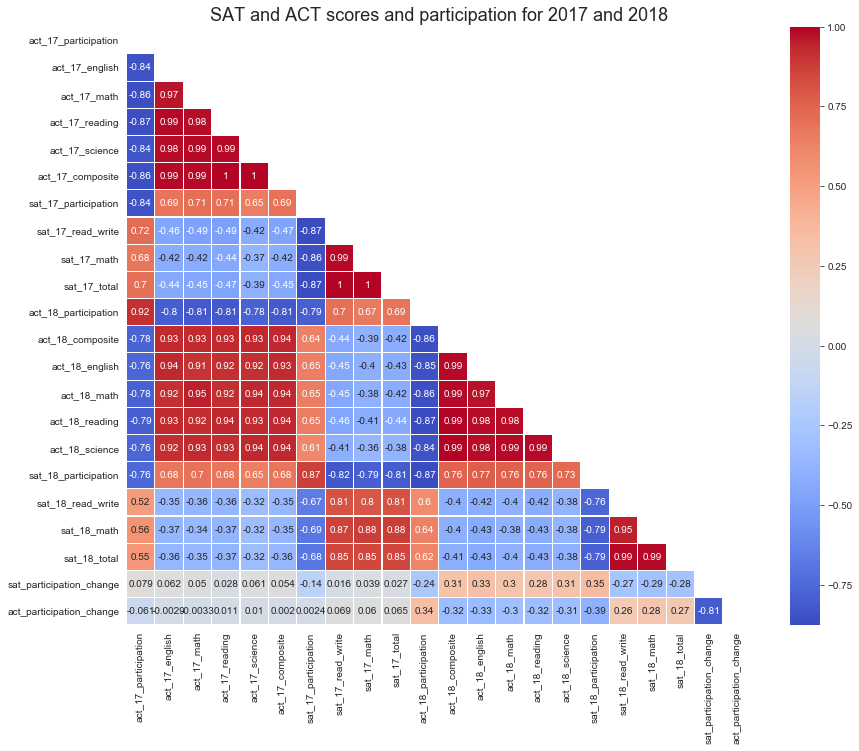

In [82]:
# create a zero matrix of the same size as the correlation matrix
custom_mask = np.zeros_like(df_final.corr()) 

# generate indices corresponding to the upper triangle of the matrix
upper_triangle_index = np.triu_indices_from(custom_mask) 

# set the upper triangle indices of the matrix to 1
custom_mask[upper_triangle_index] = True

plt.figure(figsize = (14,11))

sns.heatmap(df_final.corr(), cmap='coolwarm', lw=0.1, linecolor='white', annot=True, mask = custom_mask)
plt.title('SAT and ACT scores and participation for 2017 and 2018', fontsize=18);

### Heatmap Takeaways

    
- The average section/composite/total scores on a given test are negatively correlated with participation rate on that test. A lower participation rate usually means higher average test scores, likely because the students who voluntarily enroll for the test are the high-performers.
- ACT and SAT participation rates are also negatively correlated, since students usually either take the ACT or SAT.



#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [83]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles):
    nrows = int(np.ceil(len(list_of_columns)/2)) 
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(10,10)) 
    ax = ax.ravel()                              # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        if 'act' in column:
            color = 'cornflowerblue'
        else:
            color = 'lightslategrey'
        ax[i].hist(dataframe[column], color=color)
        ax[i].set_title(list_of_titles[i], fontsize=16)
        ax[i].axvline(x=dataframe[column].median(), color='b', label='median')
        ax[i].axvline(x=dataframe[column].mean(), color='r', label='mean')
        ax[i].legend(loc=0, frameon=False)
    fig.tight_layout(pad=3.0)

## Histograms

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

In [84]:
participation_cols = ['act_17_participation', 'act_18_participation', 'sat_17_participation', 'sat_18_participation']
math_cols = ['act_17_math', 'act_18_math', 'sat_17_math', 'sat_18_math']
reading_cols = ['act_17_reading', 'act_18_reading', 'sat_17_read_write', 'sat_18_read_write']

participation_titles = ['ACT 2017 Participation', 'ACT 2018 Participation', 
                        'SAT 2017 Participation', 'SAT 2018 Participation']
math_titles = ['ACT 2017 Math Scores', 'ACT 2018 Math Scores', 'SAT 2017 Math Scores', 'SAT 2018 Math Scores']
reading_titles = ['ACT 2017 Reading Scores', 'ACT 2018 Reading Scores', 
                  'SAT 2017 Reading and Writing Scores', 'SAT 2018 Reading and Writing Scores']

### Participation rates for SAT & ACT

- The year-over-year change in ACT and SAT participation rates were minimal.
- The distributions for ACT and SAT participation rates are not evenly spread and sort of mirror each other.
- The ACT's distribution has a central tendency around 60-70% for both years.
- The SAT's distribution has a central tendency around 40% for 2017 and 45% in 2018.
- The ACT has a high concentration of very high participation rates (>90%), and a group of states in the 30% participation range.
- The SAT has a high concentration of very low participation rates (~10%), a group of states with 60-70% participation rate, and a group of states with 100% participation. 
    


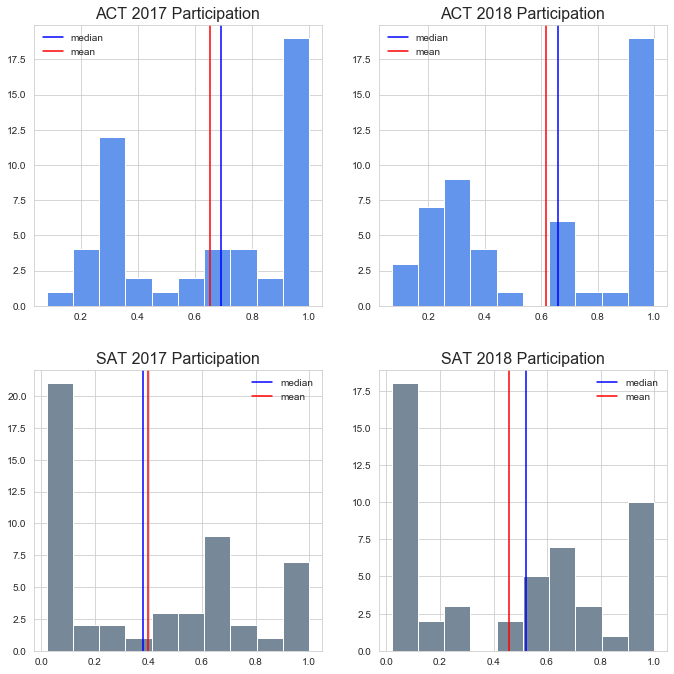

In [85]:
subplot_histograms(df_final, participation_cols, participation_titles)

### Math scores for SAT & ACT

- The distributions of the math scores for the SAT and ACT remained fairly consistent across both years.
- Both ACT and SAT math scores have a bimodal distribution, although SAT has more obvious peaks.
- The ACT scores are more evenly distributed across the range of scores obtained.
    

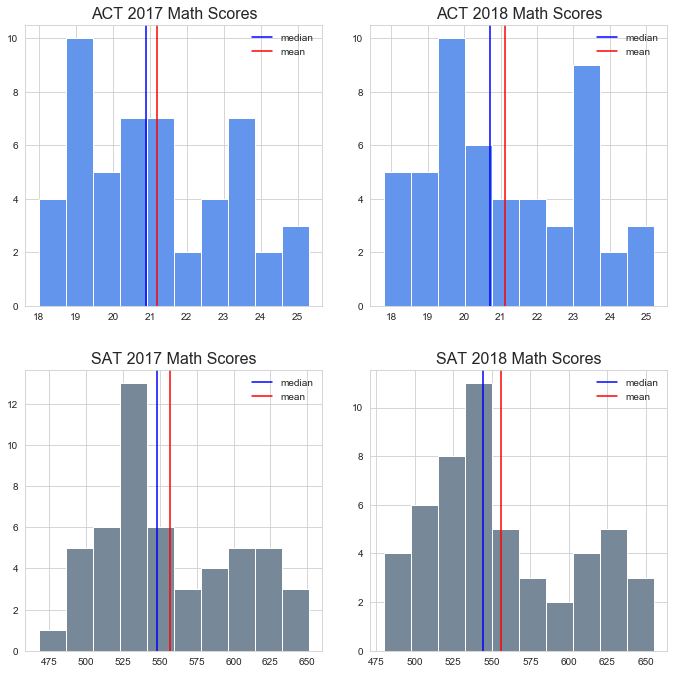

In [86]:
subplot_histograms(df_final, math_cols, math_titles)

### Reading/verbal scores for SAT & ACT


- The histograms show a bimodal distribution.
- The distributions for ACT and SAT look similar, except that there are more high performers in the SAT reading and writing section than the ACT reading section. 
- Again, the distribution of scores for the reading and writing sections remained largely consistent across both years. 



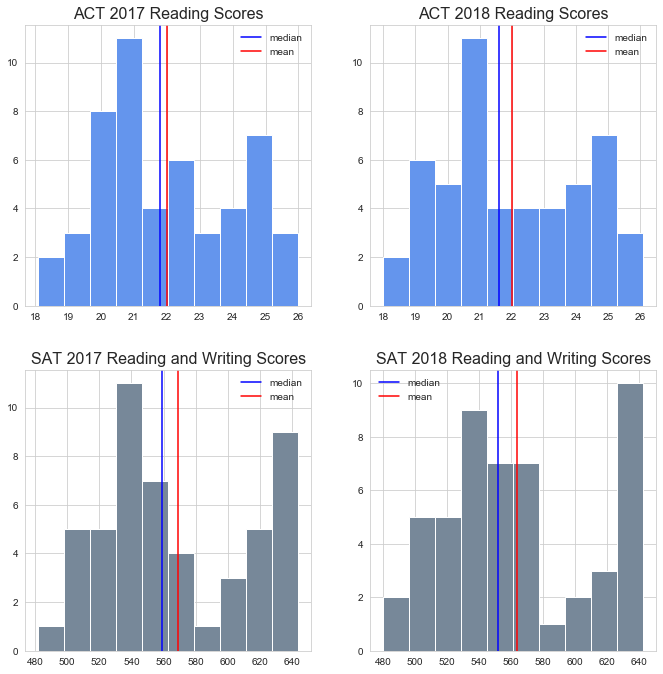

In [87]:
subplot_histograms(df_final, reading_cols, reading_titles)

## Scatterplots

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [88]:
def subplot_scatterplots(dataframe, x, y, x_label, y_label, title):
    fig, ax = plt.subplots(figsize=(6,5))
       
    ax = sns.regplot(x=dataframe[x], y=dataframe[y], data=dataframe)
    
    ax.set_title(title, fontsize=16)                 
    ax.set_xlabel(x_label, fontsize=13)
    ax.set_ylabel(y_label, fontsize=13)

### SAT vs. ACT scores for 2017


The four plots below showing SAT scores vs. ACT scores for 2017 have a general downward sloping trend, meaning that states with good SAT section scores tend to have poor ACT section scores, and vice versa. 

This is expected as states usually have a regulation or preference for which test their high school students take. States that require the ACT, for instance, would have relatively low ACT average scores and relatively high SAT average scores, since those who take the SAT are likely only those who are trying to attain good scores to enter the college of their choice. Their ACT scores would be more indicative of the abilities of the general student population whereas their SAT scores would only reflect the performance of aspiring college students.


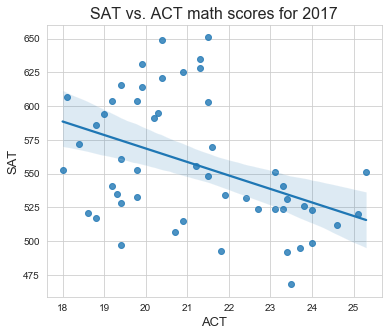

In [89]:
subplot_scatterplots(df_final, 'act_17_math', 'sat_17_math', 'ACT', 'SAT', 'SAT vs. ACT math scores for 2017')

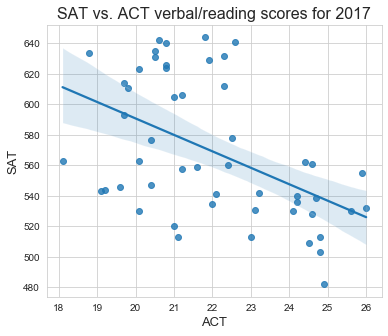

In [90]:
subplot_scatterplots(df_final, 'act_17_reading', 'sat_17_read_write', 
                     'ACT', 'SAT', 'SAT vs. ACT verbal/reading scores for 2017')

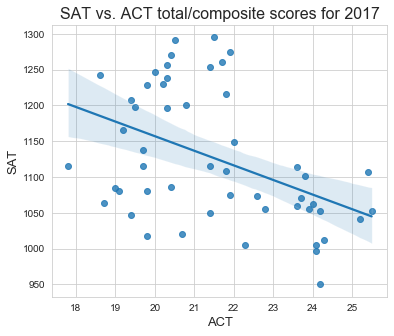

In [91]:
subplot_scatterplots(df_final, 'act_17_composite', 'sat_17_total', 
                     'ACT', 'SAT', 'SAT vs. ACT total/composite scores for 2017')

### 2017 vs. 2018 Total / Composite scores

- There is generally a upward sloping trend between the 2017 and 2018 scores for both the SAT and ACT, which means that most states were able to maintain their performance in the tests. 
- There are some states that saw a drop in SAT scores in 2018, which is likely an effect of higher participation rates in those states. This is because when participation rates increase, there are more students across a wider range of academic ability taking the test, which would likely pull down the state average score. These states should also see a rise in their average ACT scores, if ACT participation falls as a result of higher SAT participation.


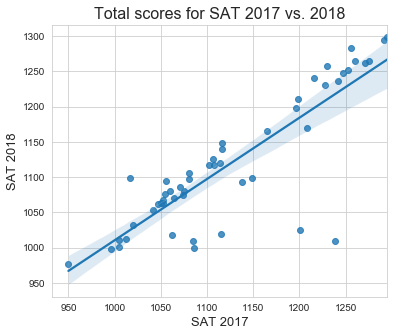

In [92]:
subplot_scatterplots(df_final, 'sat_17_total', 'sat_18_total', 
                     'SAT 2017', 'SAT 2018', 'Total scores for SAT 2017 vs. 2018')

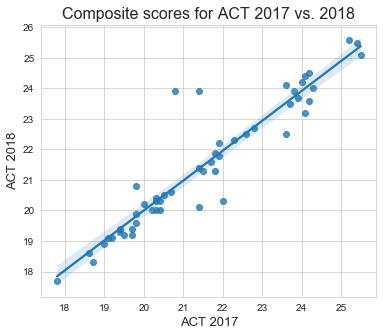

In [93]:
subplot_scatterplots(df_final, 'act_17_composite', 'act_18_composite', 
                     'ACT 2017', 'ACT 2018', 'Composite scores for ACT 2017 vs. 2018')

## Boxplots

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [94]:
df_final.head(3)

,state,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite,sat_17_participation,sat_17_read_write,sat_17_math,...,act_18_english,act_18_math,act_18_reading,act_18_science,sat_18_participation,sat_18_read_write,sat_18_math,sat_18_total,sat_participation_change,act_participation_change
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,...,18.9,18.3,19.6,19.0,0.06,595,571,1166,0.01,0.00
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,...,19.8,20.6,21.6,20.7,0.43,562,544,1106,0.05,-0.32
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,...,18.2,19.4,19.5,19.2,0.29,577,572,1149,-0.01,0.04


In [95]:
def boxplotter(dataframe, x_label, y_label, title):
    fig, ax = plt.subplots(figsize=(6,5))
       
    ax = sns.boxplot(data=dataframe, orient='h', palette="RdBu")
    
    ax.set_title(title, fontsize=16)                 
    ax.set_xlabel(x_label, fontsize=13)
    ax.set_ylabel(y_label, fontsize=13)

### The ACT sees higher participation rates than the SAT

- As seen from the below boxplot, the distribution of ACT participation rate is centered significantly higher than that of the SAT, although the gap had reduced in 2018 compared to 2017. 
- The ACT median is above 60% for both years whereas the median for SAT is below 60%. That said, the SAT median did see a significant improvement from <40% to ~52%, and the 75th percentile value improved from ~66% to ~77%.
- There are no upper whiskers for the ACT boxplots because 1/3 of all states had a 100% participation rate in 2017 and 2018, which means that the 75th percentile value is the same as the maximum 100th percentile value. 
- Although the ACT has higher participation rates than the SAT, we should note that in 2018, the SAT had a higher total number of test-takers. [Source: Nearly 2 million U.S. students in the class of 2018 took the SAT during high school, compared with 1.91 million who took the ACT. A surge in delivery of the SAT on school days helped fuel the switch.](https://www.washingtonpost.com/education/2018/10/23/sat-reclaims-title-most-widely-used-college-admission-test/)



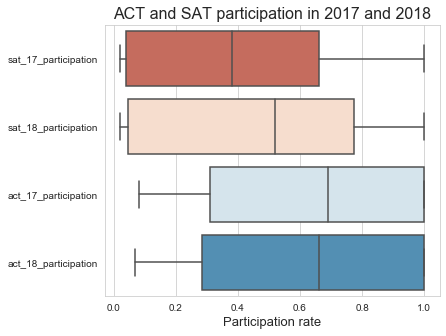

In [96]:
boxplotter(df_final[['sat_17_participation', 'sat_18_participation', 'act_17_participation', 'act_18_participation']], 
           'Participation rate', '', 'ACT and SAT participation in 2017 and 2018')

### A higher minimum SAT score was obtained in 2018

- The most significant change for SAT total scores is the improvement in the minimum score from ~950 to ~975.
- The median dipped a little, as well as the 75th percentile.


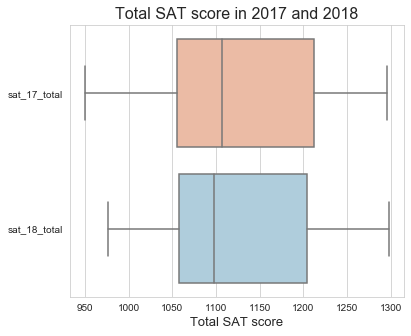

In [97]:
boxplotter(df_final[['sat_17_total', 'sat_18_total']], 'Total SAT score', '', 'Total SAT score in 2017 and 2018')

### Students performed better in SAT Reading and Writing than Math


- Average scores in the SAT reading and writing section were centered slightly higher than the math section for both years. 
- The average scores for both sections were highly right-skewed, meaning that there were many states performing worse than average.
- The median for both sections dipped in 2018, with the Reading and Writing section declining more than the Math section.
- There is a bigger range of average scores obtained for math, with lower minimum average scores and higher maximum average scores compared to Reading and Writing. However, the interquartile range for average math scores is smaller.
    


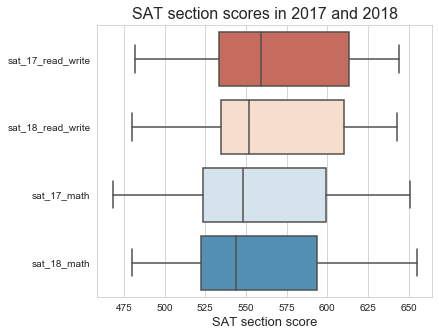

In [98]:
boxplotter(df_final[['sat_17_read_write', 'sat_18_read_write', 'sat_17_math', 'sat_18_math']], 
           'SAT section score', '', 'SAT section scores in 2017 and 2018')

### Minimal changes in ACT composite scores


- ACT composite scores did not change significant from 2017 to 2018. 
- The 25th percentile and the maximum rose slightly in 2018, whereas the minimum dipped slightly in the same year.
    

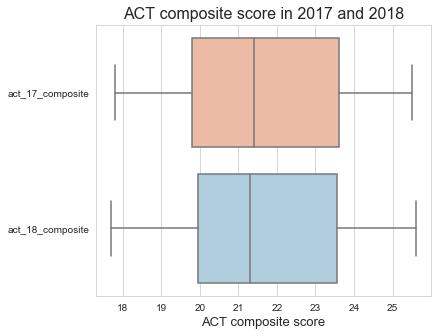

In [99]:
boxplotter(df_final[['act_17_composite', 'act_18_composite']], 
           'ACT composite score', '', 'ACT composite score in 2017 and 2018')

### Students did the best in Reading and worst in English for the ACT


- Students performed the best in the Reading section, with the highest median and maximum for both years.
- Students fared the worst in the English section; the mimimum for English is the lowest out of the four sections by a significant margin. This is interesting to observe given that English and Reading both test language skills, suggesting that these two sections have very different formats and/or difficulty levels.
- Overall, performance in each section did not change significantly in 2018. 
- The section with the biggest changes was the English section:
    - Increase in minimum and maximum average score
    - Increase in 75th percentile
    - Decrease in the median
    

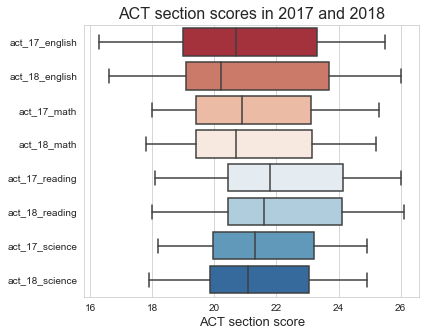

In [100]:
boxplotter(df_final[['act_17_english', 'act_18_english', 'act_17_math', 'act_18_math',
                     'act_17_reading', 'act_18_reading','act_17_science', 'act_18_science']], 
           'ACT section score', '', 'ACT section scores in 2017 and 2018')

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

### Inverse relationship between SAT scores and participation rate


Generally, when participation rates increase, the average scores declines because a wider range of students, with a wider range of academic ability, submit tests for scoring. When a test is not mandatory, the students who choose to take the test are those who are motivated to achieve a high score in order to enter a good college, thus we will see higher scores on average.

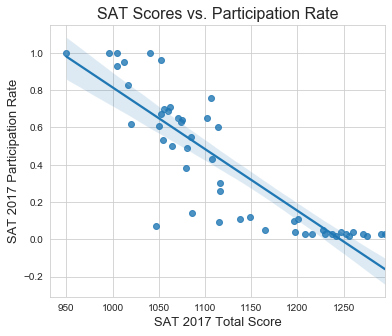

In [101]:
subplot_scatterplots(df_final, 'sat_17_total', 'sat_17_participation', 
                     'SAT 2017 Total Score', 'SAT 2017 Participation Rate', 
                     'SAT Scores vs. Participation Rate')

### Inverse relationship between SAT vs. ACT participation rates


SAT and ACT participation rates have an inverse relationship, as seen from the general downward sloping trend below. This is expected as the two tests are usually substitutes of one another, thus a higher participation in one test would see a lower participation in the other.

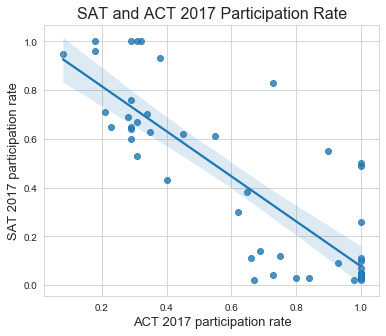

In [108]:
# 2017 ACT vs SAT participation rates
subplot_scatterplots(df_final, 'act_17_participation', 'sat_17_participation', 
                     'ACT 2017 participation rate', 'SAT 2017 participation rate', 
                     'SAT and ACT 2017 Participation Rate')

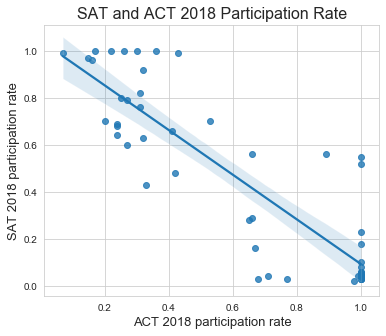

In [109]:
# 2018 ACT vs SAT participation rates
subplot_scatterplots(df_final, 'act_18_participation', 'sat_18_participation', 
                     'ACT 2018 participation rate', 'SAT 2018 participation rate', 
                     'SAT and ACT 2018 Participation Rate')

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

[Link to live Tableau file: SAT 2018 participation rate in the U.S. by state](https://public.tableau.com/profile/zi.xin.lee#!/vizhome/SAT2018participationrateintheU_S_bystate/SAT18participation?publish=yes)

[Link to live Tableau file: ACT vs. SAT preference in the U.S. by state (2018 data)](https://public.tableau.com/profile/zi.xin.lee#!/vizhome/ACTvs_SATpreferenceintheU_S_bystate2018data/SATACTpreference)

![](../images/SAT-18-participation.png)
![](../images/ACT-SAT-18-map.png)

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that **measures of *central tendency*, *spread*, and *shape/skewness*** provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

### Participation rates


#### SAT
- SAT's central tendency for 2017 (mean: 0.398, median: 0.380) shifted to the right in 2018 (mean: 0.457, median: 0.520). The mean was higher than the median in 2017 but it was the other way round in 2018.
- SAT's 2017 and 2018 distributions are heavily right-skewed, with the mean and median higher than the mode of ~0.1.
- For both years, the minimum is 0.02 and the maximum is 1.00, with a standard deviation of >0.35. This means that there is a huge variation in SAT participation rates across the U.S. states.

#### ACT
- ACT's central tendency for 2017 (mean: 0.652, median: 0.690) shifted to to the left in 2018 (mean: 0.616, median: 0.660).
- ACT's 2017 and 2018 distributions are heavily left-skewed, with the mean and median lower than the mode of 1.00.
- Participation rates range from 0.07 to 1.00, with a standard deviation of >0.32. Similar to the SAT, there is a huge variation in ACT participation rates across the U.S. states.
    


In [104]:
mask = ['participation' in x for x in df_final.columns.values]
df_final[df_final.columns.values[mask]].describe()

,act_17_participation,sat_17_participation,act_18_participation,sat_18_participation,sat_participation_change,act_participation_change
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.652549,0.398039,0.616471,0.457451,0.059412,-0.036078
std,0.321408,0.352766,0.340810,0.373143,0.182717,0.134478
min,0.080000,0.020000,0.070000,0.020000,-0.270000,-0.700000
25%,0.310000,0.040000,0.285000,0.045000,0.000000,-0.040000
50%,0.690000,0.380000,0.660000,0.520000,0.010000,-0.010000
75%,1.000000,0.660000,1.000000,0.775000,0.050000,0.000000
max,1.000000,1.000000,1.000000,1.000000,0.900000,0.250000


### SAT section and total scores


**Section scores**
- SAT Math's central tendency for 2017 (mean: 556.882, median: 548.000) is very close to 2018's (mean: 557.235, median: 544.000).

- SAT Reading and Writing's central tendency is higher compared to Math. The central tendency for 2017 (mean: 569.118, median: 559.000000) is higher than 2018's (mean: 567.294118, median: 552.000000).

- The distributions for both Math and Reading and Writing are right-skewed, and the median is lower than the mean for both years. This means that there is a right-tail of high scores pulling the mean up.

- The ranges for all scores are between 468 and 655, with standard deviations between 45 and 48.

**Total scores**
- The central tendency for 2017 (mean: 1126.098, median: 1107.000) and 2018 are relatively close (mean: 1120.020, median: 1098.000).
- The median is lower than the mean, which implies that there are high scores that are pulling the mean up. 
- The distributions for both years are right-skewed, like the individual section scores.
- The spreads for 2017 (standard deviation: 92.494, range: 950-1295) and 2018 (standard deviation: 94.155, range: 977-1298) are also similar.
    


In [105]:
df_final[['sat_17_total', 'sat_18_total', 'sat_17_read_write', 'sat_18_read_write', 'sat_17_math', 'sat_18_math']].describe()

,sat_17_total,sat_18_total,sat_17_read_write,sat_18_read_write,sat_17_math,sat_18_math
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,1126.098039,1120.019608,569.117647,563.686275,556.882353,556.235294
std,92.494812,94.155083,45.666901,47.502627,47.121395,47.772623
min,950.000000,977.000000,482.000000,480.000000,468.000000,480.000000
25%,1055.500000,1057.500000,533.500000,534.500000,523.500000,522.500000
50%,1107.000000,1098.000000,559.000000,552.000000,548.000000,544.000000
75%,1212.000000,1204.000000,613.000000,610.500000,599.000000,593.500000
max,1295.000000,1298.000000,644.000000,643.000000,651.000000,655.000000


### ACT section and composite scores


**Section scores**
- All the sections have a right-skewed distribution and a central tendency in the 20-22 point range, with the mean higher than the median by approximately 1 point on average.
- English has the greatest standard deviation and spread of values.

**Composite scores**
- The central tendency for 2017 (mean: 21.52, median: 21.4) and 2018 are almost the same (mean: 21.49, median: 21.3).
- The distribution for the composite scores are right-skewed, although the tails are relatively short. 
- The spreads for 2017 (standard deviation: 2.02, range: 17.8-25.5) and 2018 (standard deviation: 2.11, range: 17.7-25.6) are also very close.



In [106]:
df_final[['act_17_composite', 'act_18_composite', 'act_17_english', 'act_17_math', 'act_17_reading', 
          'act_17_science', 'act_18_english', 'act_18_math', 'act_18_reading', 'act_18_science']].describe().T

,count,mean,std,min,25%,50%,75%,max
act_17_composite,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5
act_18_composite,51.0,21.486275,2.106278,17.7,19.95,21.3,23.55,25.6
act_17_english,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act_17_math,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act_17_reading,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act_17_science,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
act_18_english,51.0,20.988235,2.446356,16.6,19.10,20.2,23.70,26.0
act_18_math,51.0,21.125490,2.035765,17.8,19.40,20.7,23.15,25.2
act_18_reading,51.0,22.015686,2.167245,18.0,20.45,21.6,24.10,26.1
act_18_science,51.0,21.345098,1.870114,17.9,19.85,21.1,23.05,24.9


---
#### Distributions in the data

In this dataset, each data represents a sample from a population.                        
For example, for ACT math test:
- Population: the test results of all the students who take this test, nation-wide.
- Population mean: is the national average of ACT math test (total scores/total no. of test takers) 
- Sample: the state means of ACT math test. We have 51 samples (51 states)

***According to CLT, we generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?***

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

**Answer:**

**Participation rates**
- The participation rates for the SAT and ACT are not normally distributed. Instead, there is a concentration of states at either end of the range of values as described previously. This is because SAT and ACT participation are not independent of each other, and they are also influenced by state regulations, e.g. whether the states have existing contracts with ACT or College Board, or whether the state has mandated a different test for graduating high school students.
    
**Math and Reading scores**
- Compared to Participation rates, the histograms for Math and Reading scores for both the SAT and ACT more closely resemble a normal distribution. However, we cannot conclude that the scores are normally distributed because the histograms are left/right-skewed, and mostly have more than one peak. For histograms with multiple peaks, there is usually one (or more) in the 1st/2nd quartile, and one (or more) in the 3rd/4th quartile of the range of scores.



#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

**Answer:** No, we cannot conduct statistical inference using this data. 
    <br>
    
- This is because the samples in the dataset are not randomly chosen. They represent information specific to each of the 51 states, which would have varying circumstances and demographic data.
    
    
- Additionally, the ACT and SAT participation rates are correlated, i.e. they are not independent of each other. Thus, their distributions do not follow the normal distribution. In fact, they sort of mirror each other, as mentioned in the analysis of their histograms.
    
    
- As such, the Central Limit Theorem does not hold and we cannot use these samples to make statistical inferences about the entire population's ACT and SAT participation rates.    


##### Is it appropriate to compare *these* specific SAT and ACT math scores  - can we say students with higher SAT math score is better than those with lower ACT math score, or vice versa?

Why or why not?

**Answer:** It is not appropriate. The SAT and ACT math scores have different scales (200-800 for SAT and 1-36 for ACT). Also, there may likely be differences in the format and the topics tested in the SAT and ACT math test, so we cannot compare the two tests fairly.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [107]:
# Code:

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).


### Illinois
- Illinois transitioned from the ACT to SAT after awarding the College Board a [contract](https://www.chicagotribune.com/news/ct-illinois-chooses-sat-met-20160211-story.html) to administer the SAT to all its public high school juniors.
- One of the likely reasons why College Board won the contract is that they had [underbid ACT by 1.37 million.](https://thecriticalreader.com/is-the-college-board-playing-a-rigged-game/) (SAT – 14.3 million, ACT – 15.67 million)
- As part of high school accountability, the SAT test became [state-funded](https://www.chicagotribune.com/news/breaking/ct-met-illinois-act-test-scores-20181016-story.html) and free to take for all high school juniors.
- As a result, SAT participation shot up from 9% in 2017 to 99% in 2018. 
- Correspondingly, ACT participation plunged to 43% in 2018 from 93% in 2017.



### Colorado
- Similar to Illinois, the College Board [won a contract](https://co.chalkbeat.org/2015/12/23/21092477/goodbye-act-hello-sat-a-significant-change-for-colorado-high-schoolers) to administer the SAT to all high school juniors in Colorado.
- They had underbid the ACT by 6.6 million dollars. (SAT 14.8 million, ACT – 23.4 million)
- The SAT is also state-funded in Colorado and free for students to take.
- As a result, participation rate for the SAT shot up from 11% in 2017 to 100% in 2018.
- Correspondingly, the ACT participation rate fell from 100% to 30%.

During my research, I found that Michigan is the first state which the College Board had managed to win over from ACT, Inc. back in January 2015. In Michigan, the College Board had underbid the ACT by \$15.4 million (SAT – 17.1 million, ACT – 32.5 million). Illinois, Colorado, and Michigan were all states with previously longstanding relationships with the ACT, so the decision to switch over to the SAT had been a surprising one for many.

### Ohio 

Ohio is my recommended state to target, as you will see in the next section, so let's take a deeper look at its 2017 and 2018 ACT and SAT data.

- From 2017 to 2018, Ohio increased both its ACT and SAT participation. However, the increase was larger for the ACT, i.e. from 75% to 100%, whereas for SAT it was from 12% to 18%.

- The increased in participation in the ACT and SAT came about after the state made it [a requirement for all school districts to give all graduating students the ACT or SAT, regardless of whether they are going to college.](https://www.dispatch.com/news/20170228/ohio-schools-must-now-give-act-or-sat-to-all-juniors)

- It is likely that the ACT saw a greater increase in participation rate because it was already the more widely taken test in Ohio.

- It is also important to note that the fees for the SAT are higher than the ACT, which would give Ohio schools less incentive to offer the SAT to students.


## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

### Key takeaways


- **Inverse relationship between SAT vs. ACT participation rates**<BR>
SAT and ACT participation rates have an inverse relationship, as seen from the general downward sloping trend below. This is expected as the two tests are usually substitutes of one another, thus a higher participation in one test would see a lower participation in the other.
    

- **There were more SAT than ACT test-takers in 2018, but ACT still enjoys greater popularity in more states.** <BR>This is possible because 1/3 of all U.S. states have a 100% ACT participation rate. These states may have a smaller population, resulting in a lower absolute number of ACT test-takers. Still, what's important to note here is that the ACT is dominant in more states than the SAT.


- **State regulations have a big influence on test participation rates.** <BR>In the past few years, the College Board had aggressively underbid the ACT to win state contracts and they were successful in capturing market share from ACT in Colorado and Illinois, which were previously longstanding ACT-taking states. SAT participation rates shot up in both states after the SAT became a requirement. As part of high school accountability, the SAT was state-funded for students to take for free.

    
- **Free testing significantly boosts participation rate.** <BR>As seen, state-funding dramatically boosted SAT participation in Illinois and Colorado as students were more likely to take the free SAT than the paid ACT. The College Board would do well to target states that are already funding the ACT or other college admission tests and convince them to adopt (and fund) the SAT instead. This would allow the SAT to be taken by a wider group of students, e.g. students from lower-income families who would not have taken the SAT if it were not free and state-required.

    
### Final recommendation: Target Ohio


- **Large population:** Ohio is the 7th largest state in the U.S., so there is a sizeable number of new test-takers that the College Board can acquire.
    

- **Relatively low current SAT participation rates:** From 2017 to 2018, Ohio increased both its ACT and SAT participation after it became compulsory to take either test. However, the increase was larger for the ACT, i.e. from 75% to 100%, whereas for SAT it was from 12% to 18%. Thus, there is still considerable room for growth for the SAT.

    
- **High state debts:** In 2017, Ohio had the [10th highest amount of state debt](https://www.statista.com/statistics/312660/us-state-and-local-government-debt-outstanding-by-state/). If the College Board employs the same strategy of underbidding ACT, Inc. and make the cost of implementing the SAT lower compared to the ACT, they would increase their chances of persuading the Ohio Department of Education to adopt the SAT statewide.

    
- **Free to take the ACT or SAT:** The ACT and SAT are already free for public school students to take. Thus, the main task left for College Board is to explain to the Department of Education why it would be more beneficial for students to take the SAT instead of the ACT.

